## Import Packages

In [1]:
from fastbook import *
from fastai.vision.widgets import *
import torch
from fastai.tabular.all import *

ModuleNotFoundError: No module named 'fastbook'

## Constants

In [2]:
# Set all constants
images_path = 'Images'
model_save_path = 'Model/fastai/'
img_size = 128

## Data Loading & Augmentation

In [3]:
model_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(img_size))

In [4]:
dls = model_data.dataloaders(images_path)

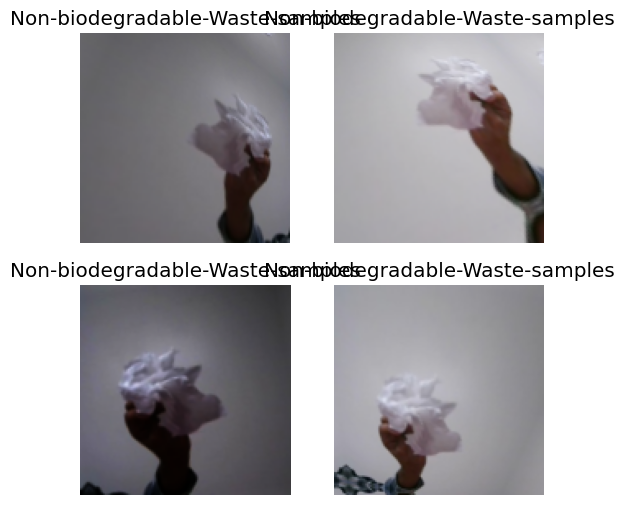

In [5]:
model_aug = model_data.new(item_tfms=Resize(img_size), batch_tfms=aug_transforms(mult=2))
dls = model_aug.dataloaders(images_path)
dls.train.show_batch(max_n=4, nrows=2, unique=True)

## Model Training

In [6]:
learn = vision_learner(dls, resnet50, metrics=[accuracy, error_rate])

SuggestedLRs(valley=0.0020892962347716093)

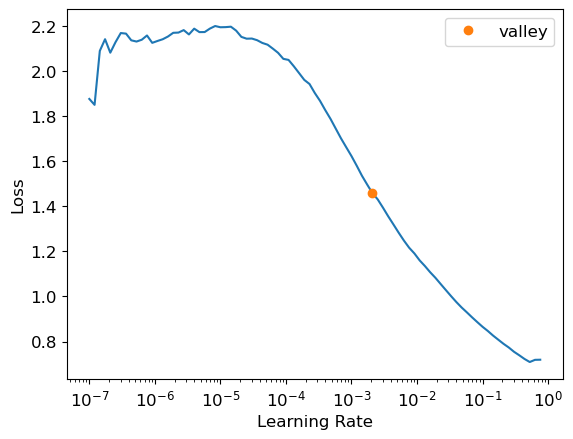

In [7]:
learning_rate = learn.lr_find()
learning_rate

In [8]:
learn.fit(3, lr=learning_rate)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.713102,0.054093,0.991667,0.008333,00:02
1,0.444334,0.008057,1.000000,0.000000,00:02
2,0.355871,0.004126,1.000000,0.000000,00:02


## Results

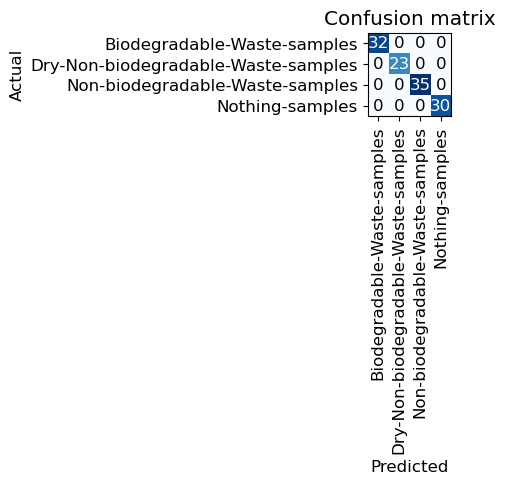

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

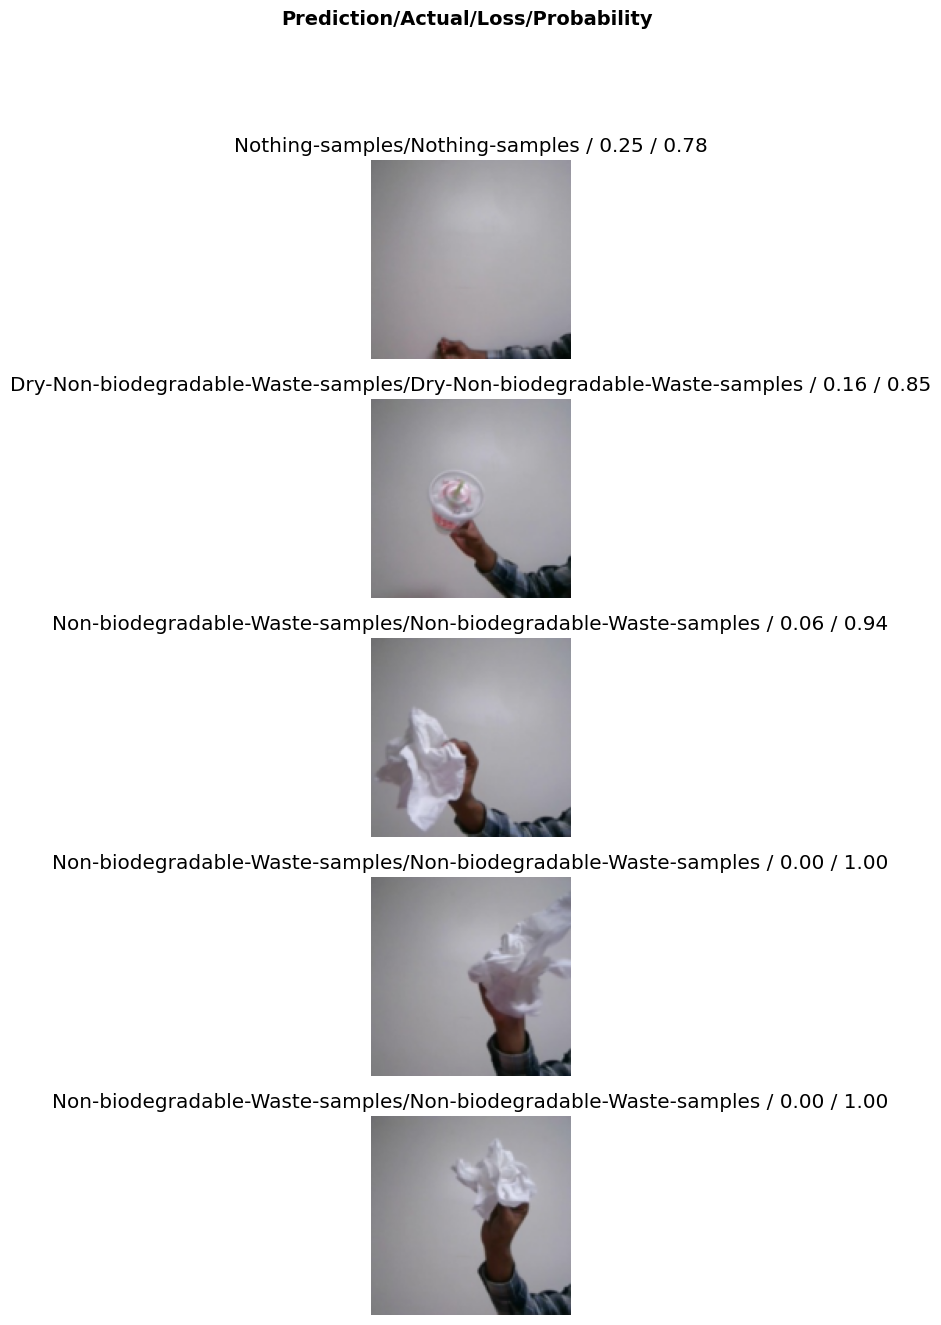

In [10]:
interp.plot_top_losses(5, nrows=5)

In [11]:
interp.print_classification_report()

                                     precision    recall  f1-score   support

        Biodegradable-Waste-samples       1.00      1.00      1.00        32
Dry-Non-biodegradable-Waste-samples       1.00      1.00      1.00        23
    Non-biodegradable-Waste-samples       1.00      1.00      1.00        35
                    Nothing-samples       1.00      1.00      1.00        30

                           accuracy                           1.00       120
                          macro avg       1.00      1.00      1.00       120
                       weighted avg       1.00      1.00      1.00       120



## Save the Model

In [12]:
learn.export(model_save_path + "Model2.pkl")
torch.save(learn, model_save_path + "Pt_Model2.pt")

## Convert the Model to Onnx Model

In [13]:
import torch
import torch.onnx

learn = load_learner(model_save_path + 'Model2.pkl')
model = learn.model.eval()
dummy_data = torch.randn(1, 3, img_size, img_size)
dummy_input = torch.autograd.Variable(dummy_data)

output_model_name = 'onnx_greenscape2.onnx'
input_name = 'image'
output_name = 'warn'

torch.onnx.export(model, dummy_input, model_save_path + output_model_name, input_names = [input_name], output_names = [output_name])

In [14]:
import onnx
onnx_model = onnx.load(model_save_path + output_model_name)
onnx.checker.check_model(onnx_model)

In [15]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256